In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Data Cleaning and Preparation
df = pd.read_csv('Product Positioning.csv')

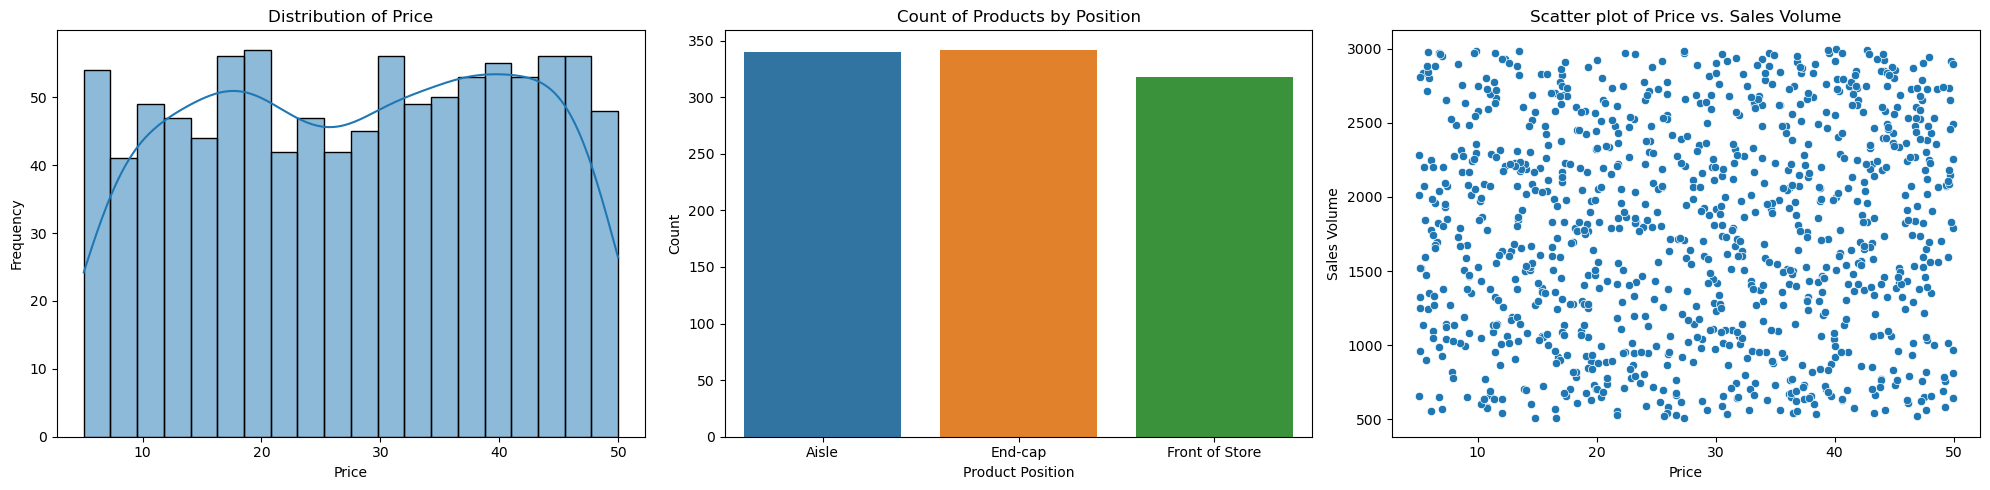

In [2]:
# Step 2: Univariate Analysis
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Product Position')
plt.title('Count of Products by Position')
plt.xlabel('Product Position')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Price', y='Sales Volume')
plt.title('Scatter plot of Price vs. Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

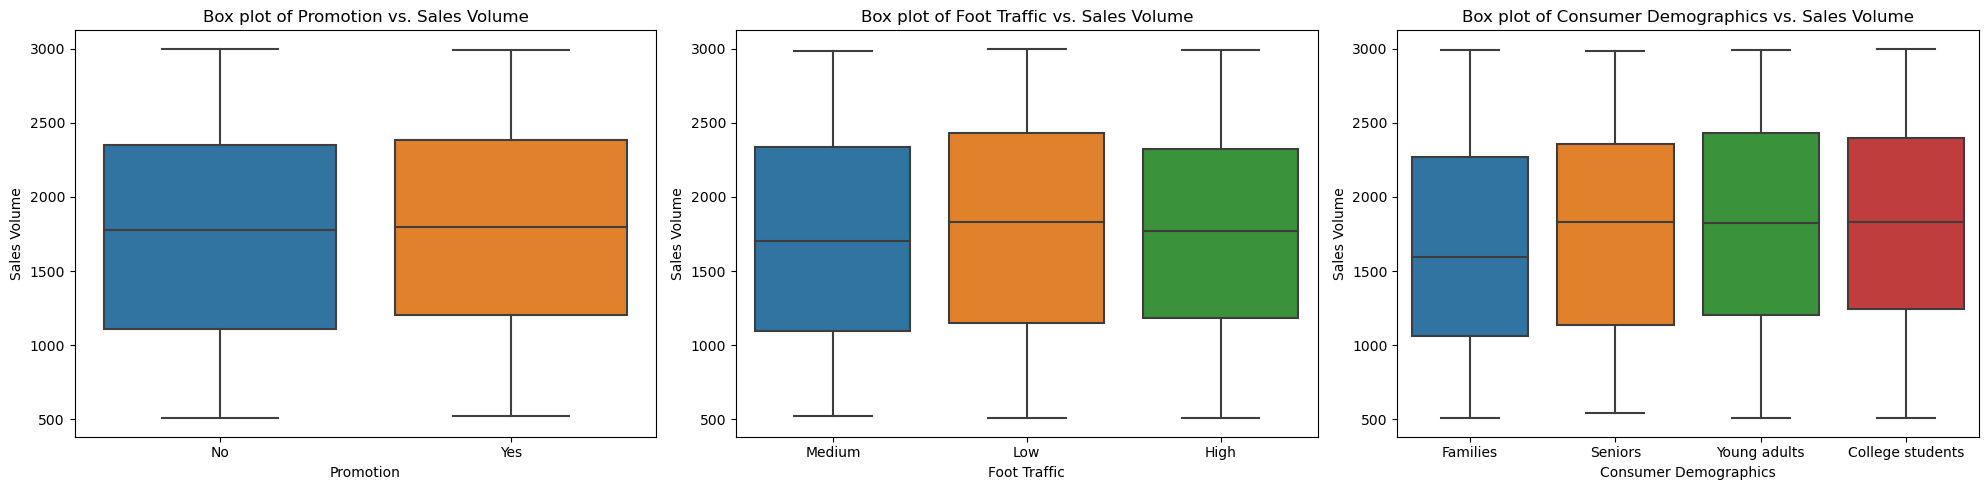

In [3]:
# Step 3: Bivariate Analysis
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Promotion', y='Sales Volume')
plt.title('Box plot of Promotion vs. Sales Volume')
plt.xlabel('Promotion')
plt.ylabel('Sales Volume')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Foot Traffic', y='Sales Volume')
plt.title('Box plot of Foot Traffic vs. Sales Volume')
plt.xlabel('Foot Traffic')
plt.ylabel('Sales Volume')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Consumer Demographics', y='Sales Volume')
plt.title('Box plot of Consumer Demographics vs. Sales Volume')
plt.xlabel('Consumer Demographics')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

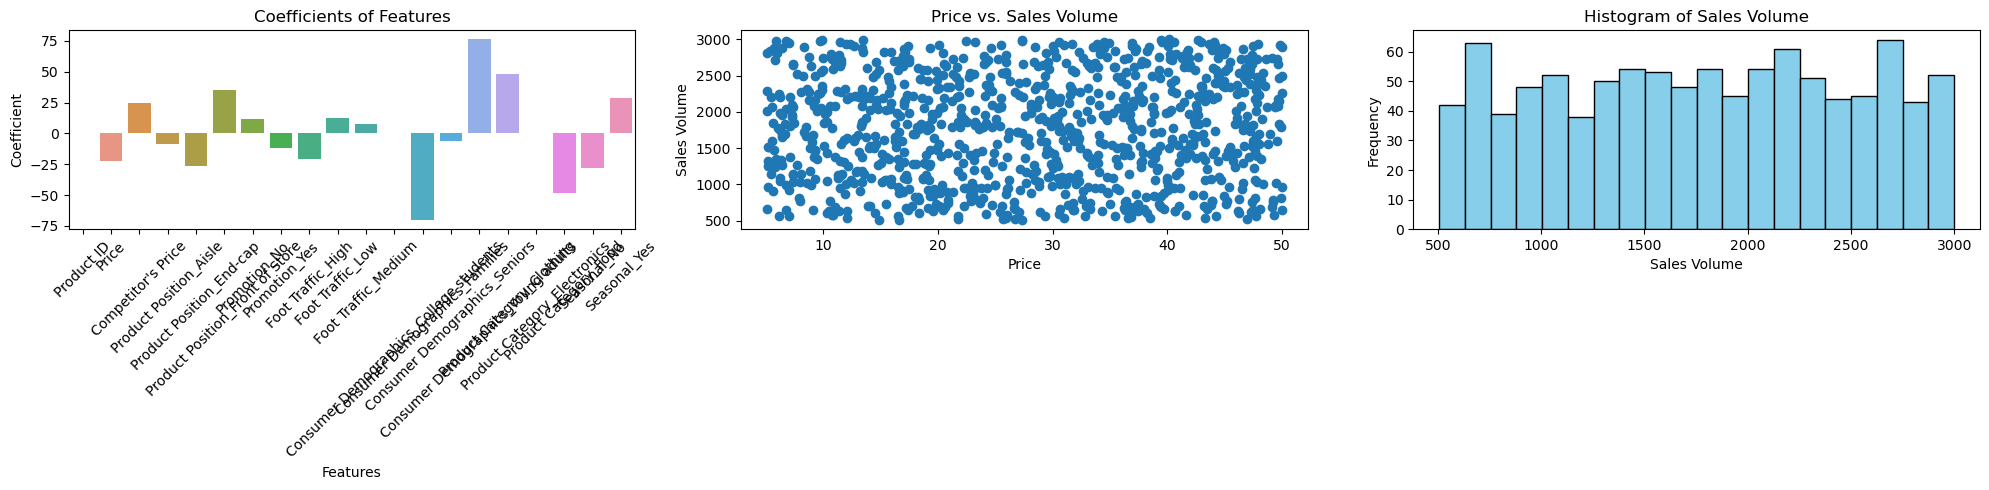

In [4]:
# Step 4: Multivariate Analysis
df_encoded = pd.get_dummies(df, columns=['Product Position', 'Promotion', 'Foot Traffic', 'Consumer Demographics', 'Product Category', 'Seasonal'])

X = df_encoded.drop('Sales Volume', axis=1)
y = df_encoded['Sales Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualize coefficients
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=X.columns, y=model.coef_)
plt.title('Coefficients of Features')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)

# Scatter plot for Price vs. Sales Volume
plt.subplot(1, 3, 2)
plt.scatter(df['Price'], df['Sales Volume'])
plt.title('Price vs. Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')

# Histogram plot for Sales Volume
plt.subplot(1, 3, 3)
plt.hist(df['Sales Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

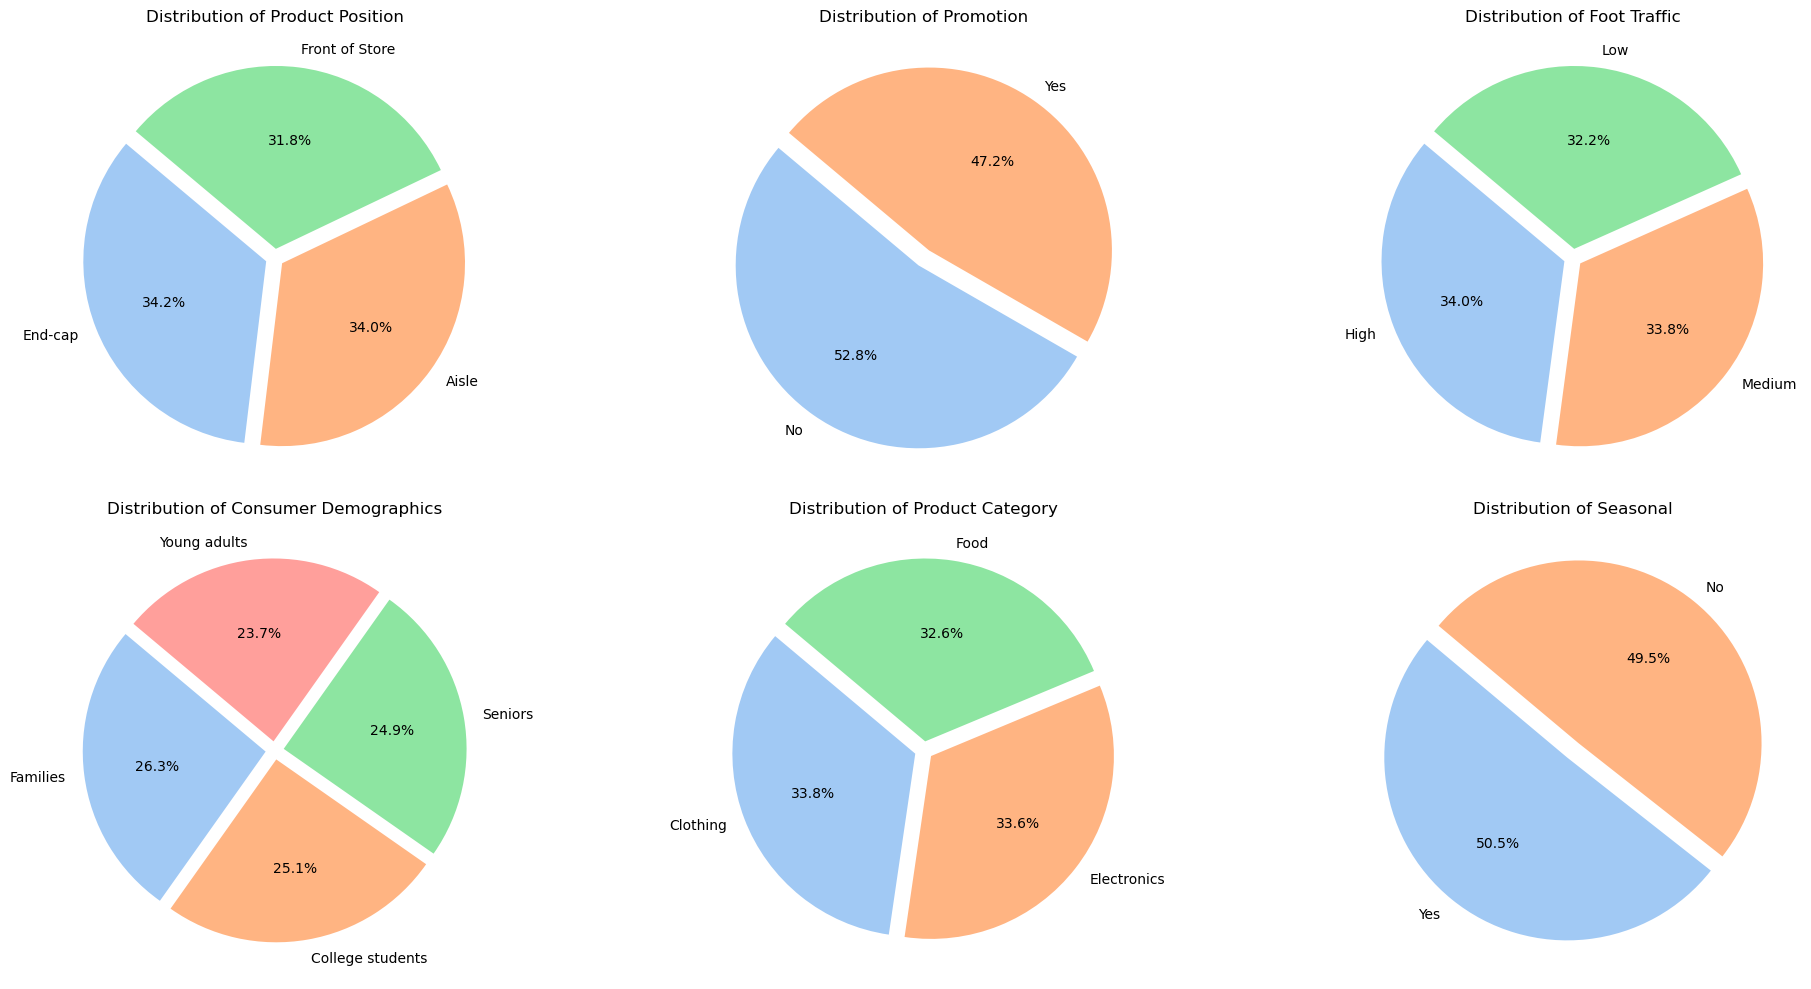

In [5]:
# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate number of rows needed to display all pie charts
num_rows = (len(categorical_columns) + 2) // 3  # Round up

# Create subplots for each categorical column
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

# Flatten axes if only one row
if num_rows == 1:
    axes = [axes]

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]  # Select appropriate axis
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=[0.05] * len(df[column].unique()), ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_ylabel('')

# Remove empty subplots
if len(categorical_columns) % 3 != 0:
    for ax in axes[-1][len(categorical_columns) % 3:]:
        ax.remove()

plt.tight_layout()
plt.show()

# Step 6: Iterative Analysis and Refinement
# Further analysis and refinement can be performed iteratively based on initial findings and feedback.